In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/stationary_distributions/data'
    if not os.path.exists(path):
        call(f'mkdir -p {path}', shell=True)
else:
    path = '/data'

In [10]:
N = 500
pi1, pi2, q1, q2, l = 0.3, 0.3, 7, 10, 0.6
data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')

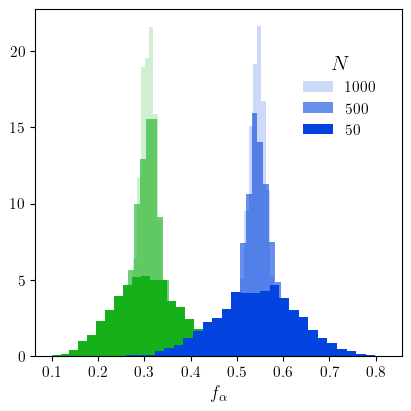

In [67]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.set_xlabel(r'$f_{\alpha}$')
pi1, pi2, q1, q2, l = 0.3, 0.3, 7.0, 10.0, 0.3
bins_N = {2500:20, 1000:15, 500:15, 50:27}
# for i,N in enumerate([50, 500, 1000]):
for i,N in enumerate([1000, 500, 50]):
    data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
    x = i*0.4
    # ax.hist(data['f0'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:red', alpha=1.0-x)
    # if N==50 or N==500:
    #     ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x) # alpha=0.4+x
    # else:
    #     ax.hist(data['f1'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x) # alpha=0.4+x
    # on increasing N:
    # ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=1.0-x)
    # ax.hist(data['f2'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:blue', alpha=1.0-x, label=f'{N}')
    # on decreasing N:
    ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x)
    ax.hist(data['f2'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:blue', alpha=0.2+x, label=f'{N}')
fig.legend(title='$N$', fontsize=11, frameon=False, loc=(0.72, 0.65))
fig.savefig(f'stat_fs_ditr_varN_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.pdf')

In [16]:
len(data)

510

(array([ 0.13297872,  0.04432624,  0.22163121,  0.04432624,  0.26595745,
         0.66489362,  0.62056738,  1.19680851,  1.68439716,  2.12765957,
         3.90070922,  5.40780142,  4.65425532, 10.46099291, 11.34751773,
         8.90957447, 13.91843972, 16.75531915, 16.4893617 , 10.7712766 ,
        16.40070922, 14.27304965,  8.24468085, 10.37234043,  8.28900709,
         4.65425532,  5.31914894,  4.03368794,  1.41843972,  1.55141844,
         0.9751773 ,  0.57624113,  0.31028369,  0.04432624,  0.08865248]),
 array([0.444     , 0.44937143, 0.45474286, 0.46011429, 0.46548571,
        0.47085714, 0.47622857, 0.4816    , 0.48697143, 0.49234286,
        0.49771429, 0.50308571, 0.50845714, 0.51382857, 0.5192    ,
        0.52457143, 0.52994286, 0.53531429, 0.54068571, 0.54605714,
        0.55142857, 0.5568    , 0.56217143, 0.56754286, 0.57291429,
        0.57828571, 0.58365714, 0.58902857, 0.5944    , 0.59977143,
        0.60514286, 0.61051429, 0.61588571, 0.62125714, 0.62662857,
        0.6

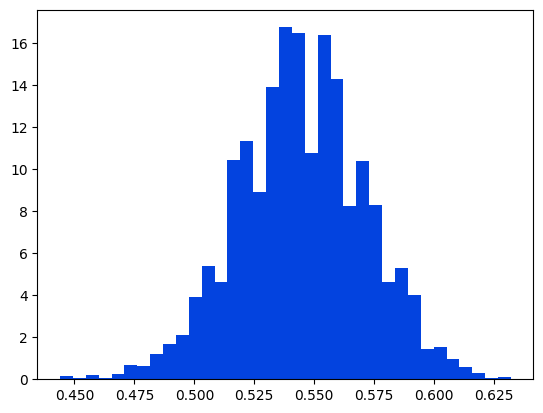

In [27]:
fig, ax = plt.subplots()
N = 500
pi1, pi2, l = 0.3, 0.3, 0.3
# q1, q2 = 7, 10
# data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
# ax.hist(data['f2'], density=True, rwidth=1.0, color='xkcd:blue', alpha=0.8)
q1, q2 = 7.0, 10.0
data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
ax.hist(data['f2'], bins=35, density=True, rwidth=1.0, color='xkcd:blue')

In [19]:
len(data['f2'])

4200